In [ ]:
import random
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
p = [1000, 2000, 1500, 2500, 300]   # potenciales clientes por anuncio
q = [65, 90, 40, 60, 20]            # valoraciones mínimas
c = [160, 300, 40, 100, 10]         # costos unitarios correspondientes
max_ads = [15, 10, 25, 4, 30]

In [45]:
domains = {i: list(range(max_ads[i] + 1)) for i in range(5)}
domains

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 2: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 3: [0, 1, 2, 3, 4],
 4: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [46]:
def cons_tv(x1, x2):   return c[0]*x1 + c[1]*x2 <= 3800
def cons_dr(x3, x4):   return c[2]*x3 + c[3]*x4 <= 2800
def cons_d_r(x3, x5):  return c[2]*x3 + c[4]*x5 <= 3500

def Z1(x):  return sum(p[i]*q[i]*x[i] for i in range(5))
def Z2(x):  return sum(c[i]*x[i] for i in range(5))

In [47]:
def revise(dom, i, j, cn):
    revised = False
    for xi in dom[i][:]:
        if not any(cn(xi, xj) for xj in dom[j]):
            dom[i].remove(xi)
            revised = True
    return revised

In [48]:
def ac3(dom, arcs):
    queue = deque(arcs)
    while queue:
        i, j, cn = queue.popleft()
        if revise(dom, i, j, cn):
            for a, b, cfunc in arcs:
                if b == i and a != j:
                    queue.append((a, b, cfunc))
    return dom

In [49]:
def dominates_dir(a, b, directions):
    """
    a, b: tuplas (x_int, z1, z2)
    directions: lista ['max'|'min', 'max'|'min']
    """
    za, zb = [a[1], a[2]], [b[1], b[2]]
    # Debe ser al menos tan bueno en todos y mejor en uno
    all_good = all((d=='max' and za[i] >= zb[i]) or (d=='min' and za[i] <= zb[i])
                   for i, d in enumerate(directions))
    strict   = any((d=='max' and za[i] > zb[i])  or (d=='min' and za[i] < zb[i])
                   for i, d in enumerate(directions))
    return all_good and strict

In [50]:
def pareto_front(sols, directions):
    """Devuelve la lista de soluciones no dominadas según 'directions'."""
    front = []
    for s in sols:
        if not any(dominates_dir(o, s, directions) for o in sols if o!=s):
            front.append(s)
    return front


In [51]:
def dominates(a, b):
    """¿a = (x_a, Z1_a, Z2_a) domina a b = (x_b, Z1_b, Z2_b)?"""
    Za1, Za2 = a[1], a[2]
    Zb1, Zb2 = b[1], b[2]
    return (Za1 >= Zb1 and Za2 <= Zb2) and (Za1 > Zb1 or Za2 < Zb2)

In [52]:
arcos = [
    (0,1,cons_tv), (1,0,lambda x2,x1: cons_tv(x1,x2)),
    (2,3,lambda x3,x4: cons_dr(x3,x4)), (3,2,lambda x4,x3: cons_dr(x3,x4)),
    (2,4,lambda x3,x5: cons_d_r(x3,x5)), (4,2,lambda x5,x3: cons_d_r(x3,x5)),
]

In [53]:
pruned = ac3({i: domains[i].copy() for i in domains}, arcos)

In [54]:
N, T = 30, 100
all_solutions = []   # acumularemos (x_int, Z1, Z2)
pop = [[random.uniform(0, max_ads[i]) for i in range(5)] for _ in range(N)]
pop

[[2.650559510243977,
  1.645697310702704,
  15.351055130025234,
  3.139044560723977,
  17.61634939316163],
 [2.636860822112979,
  8.208497871981855,
  5.50154426029337,
  0.27226443266683376,
  8.67046716590246],
 [4.530880107301757,
  1.8420138132300612,
  21.087974967215363,
  3.228776548433095,
  8.448954937199527],
 [8.855442713582542,
  1.1127127902965517,
  11.980816933229596,
  0.3492526353124674,
  25.965855256746874],
 [0.5983972127891146,
  1.777274265838924,
  17.098958001561133,
  1.3138538164918683,
  14.150230706086383],
 [2.60251021328974,
  3.5680629409932907,
  12.425998761740702,
  0.2947536418235961,
  29.957675911350922],
 [2.6481089206135118,
  4.007515964499894,
  17.687560585752284,
  1.877414830819915,
  25.263979516635526],
 [3.6283074604265004,
  9.327956993875834,
  7.940193522289022,
  2.471090942779767,
  4.7680824221831095],
 [10.876158940701936,
  3.3480121582996802,
  2.264669581402301,
  2.8881524390862365,
  23.146188079263602],
 [13.62035644489331,
  

In [55]:
def record_solution(x_int):
    z1, z2 = Z1(x_int), Z2(x_int)
    tup = (tuple(x_int), z1, z2)
    all_solutions.append(tup)

In [56]:
for ind in pop:
    x_int = [int(round(v)) for v in ind]
    if cons_tv(x_int[0],x_int[1]) and cons_dr(x_int[2],x_int[3]) and cons_d_r(x_int[2],x_int[4]):
        record_solution(x_int)

In [57]:
for t in range(1, T+1):
    new_pop = []
    for ind in pop:
        leader = random.choice(all_solutions)[0]
        if random.random() < 0.5:
            new = [ ind[i] + random.random()*(leader[i]-ind[i])*random.randint(1,2) for i in range(5) ]
        else:
            factor = 1 - t/ T
            new = [ ind[i] + random.random()*(leader[i]-ind[i])*factor for i in range(5) ]
        new = [ max(0, min(max_ads[i], v)) for i, v in enumerate(new) ]
        new_pop.append(new)
    # evaluamos y grabamos factibles
    for ind in new_pop:
        x_int = [int(round(v)) for v in ind]
        if cons_tv(x_int[0],x_int[1]) and cons_dr(x_int[2],x_int[3]) and cons_d_r(x_int[2],x_int[4]):
            record_solution(x_int)
    pop = new_pop

In [58]:
front_maxmin = pareto_front(all_solutions, ['max','min'])

front_minmax = pareto_front(all_solutions, ['min','max'])

In [59]:
df_mm = pd.DataFrame([(z1,z2) for _,z1,z2 in front_maxmin], columns=['Z1','Z2'])
df_mn = pd.DataFrame([(z1,z2) for _,z1,z2 in front_minmax], columns=['Z1','Z2'])

In [60]:
print(df_mm.describe()[['Z1','Z2']])
print(df_mn.describe()[['Z1','Z2']])

                 Z1           Z2
count  3.700000e+01    37.000000
mean   2.621568e+06  2871.081081
std    8.009342e+05  1236.769501
min    9.830000e+05   880.000000
25%    1.965000e+06  1750.000000
50%    2.894000e+06  3200.000000
75%    3.266000e+06  4060.000000
max    3.737000e+06  4790.000000
                 Z1           Z2
count  4.500000e+01    45.000000
mean   1.952044e+06  3034.888889
std    8.012515e+05  1181.892977
min    6.660000e+05  1050.000000
25%    1.349000e+06  2100.000000
50%    1.761000e+06  3020.000000
75%    2.439000e+06  4000.000000
max    3.737000e+06  4790.000000


In [61]:
mm_sorted = df_mm.sort_values('Z1').reset_index(drop=True)
mm_sorted

,Z1,Z2
0,983000,880
1,1182000,890
2,1380000,1040
3,1386000,1050
4,1566000,1140
5,1620000,1380
6,1659000,1570
7,1678000,1640
8,1841000,1650
9,1965000,1750


In [62]:
ideal_z1 = mm_sorted['Z1'].max()
ideal_z2 = mm_sorted['Z2'].min()

In [67]:
distances = np.sqrt((mm_sorted['Z1'] - ideal_z1)**2 + (mm_sorted['Z2'] - ideal_z2)**2)
best_idx  = distances.idxmin()
best_z1   = mm_sorted.loc[best_idx, 'Z1']
best_z2   = mm_sorted.loc[best_idx, 'Z2']
distances

0     2.754000e+06
1     2.555000e+06
2     2.357000e+06
3     2.351000e+06
4     2.171000e+06
5     2.117000e+06
6     2.078000e+06
7     2.059000e+06
8     1.896000e+06
9     1.772000e+06
10    1.772000e+06
11    1.651000e+06
12    1.590001e+06
13    1.225001e+06
14    1.166001e+06
15    1.040001e+06
16    8.740024e+05
17    8.480029e+05
18    8.430032e+05
19    8.030035e+05
20    7.710037e+05
21    7.390040e+05
22    7.340042e+05
23    7.280052e+05
24    7.050055e+05
25    6.420061e+05
26    5.120080e+05
27    4.710107e+05
28    4.210128e+05
29    4.060133e+05
30    3.370165e+05
31    3.370165e+05
32    2.710211e+05
33    1.120537e+05
34    1.070602e+05
35    5.613014e+04
36    3.910000e+03
dtype: float64

In [64]:
plt.figure(figsize=(8,6))


mn_sorted = df_mn.sort_values('Z1').reset_index(drop=True)
x_common = np.linspace(
    max(mm_sorted['Z1'].min(), mn_sorted['Z1'].min()),
    min(mm_sorted['Z1'].max(), mn_sorted['Z1'].max()),
    200
)

<Figure size 800x600 with 0 Axes>

In [65]:
y_mm = np.interp(x_common, mm_sorted['Z1'], mm_sorted['Z2'])
y_mn = np.interp(x_common, mn_sorted['Z1'], mn_sorted['Z2'])

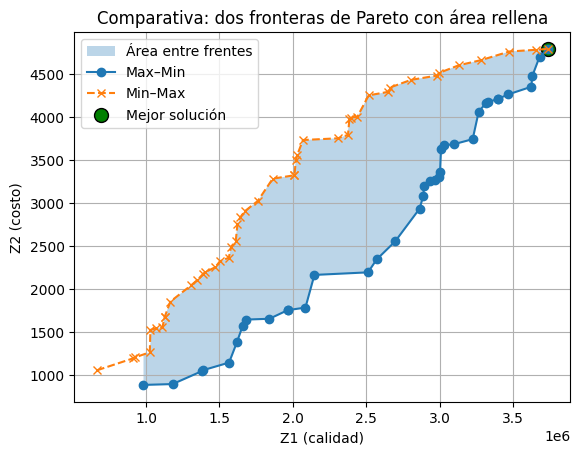

In [66]:
plt.fill_between(x_common, y_mm, y_mn, alpha=0.3, label='Área entre frentes')

# Dibujamos ambos frentes
plt.plot(mm_sorted['Z1'], mm_sorted['Z2'], marker='o', linestyle='-', label='Max–Min')
plt.plot(mn_sorted['Z1'], mn_sorted['Z2'], marker='x', linestyle='--', label='Min–Max')

# Marcamos la mejor solución en verde
plt.scatter([best_z1], [best_z2],
            color='green', s=100, edgecolors='black',
            label='Mejor solución')

plt.xlabel('Z1 (calidad)')
plt.ylabel('Z2 (costo)')
plt.title('Comparativa: dos fronteras de Pareto con área rellena')
plt.legend()
plt.grid(True)
plt.show()